In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid
%matplotlib inline
import random

In [2]:
import motif_processor
reload(motif_processor)

<module 'motif_processor' from 'motif_processor.pyc'>

In [3]:
MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=True, 
                                                   cell_line="HepG2", 
                                                  meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
motif_tensor, motif_names = MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


In [4]:
HepG2MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="HepG2", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
HepG2_motif_tensor, HepG2_motif_names = HepG2MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)

K562MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="K562", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/K562_pos_steme/steme.txt")
K562_motif_tensor, K562_motif_names = K562MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


LCLMotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="LCL", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/LCL_pos_steme/steme.txt")
LCL_motif_tensor, LCL_motif_names = LCLMotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)
MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=True, 
                                                   cell_line="HepG2", 
                                                  meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
motif_tensor, motif_names = MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


In [5]:
motifDistanceProcessorObj = motif_processor.MotifDistanceProcessor([],[],[])
binary_mat = motifDistanceProcessorObj.process_Pouya(motif_names)

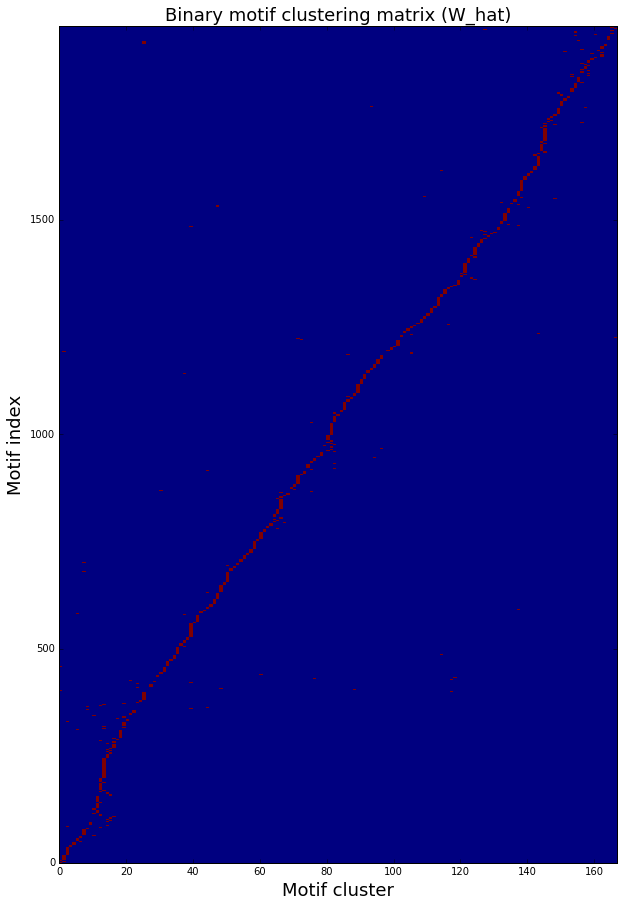

In [6]:
plt.figure(figsize=(10,15))
plt.pcolor(binary_mat,cmap='jet')
plt.axis('tight')
plt.xlabel('Motif cluster',fontsize=18)
plt.ylabel('Motif index',fontsize=18)
plt.title("Binary motif clustering matrix (W_hat)",fontsize=18)
plt.savefig("clustered_binary_motifs.png", dpi=300)
plt.show()

In [7]:
import common_utils
reload(common_utils)

Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 82.0% of memory, cuDNN 5005)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are mo

<module 'common_utils' from 'common_utils.pyc'>

In [8]:
CrossValProcObj = common_utils.CrossValProcessor(output_dirs = ["./HEPG2_act_1_31/", "./HEPG2_rep_1_31/", 
                                                                      "./K562_act_1_31/", "./K562_act_1_31/",
                                                                      "./LCL_act_alt_1_31/"])

HepG2_binObj = CrossValProcObj.HepG2_binObj
K562_binObj = CrossValProcObj.K562_binObj
LCL_binObj = CrossValProcObj.LCL_binObj
binObjs = [HepG2_binObj, K562_binObj, LCL_binObj]
CvDicts = [CrossValProcObj.HepG2_dict, CrossValProcObj.K562_dict, CrossValProcObj.LCL_dict]
motif_tensors = [motif_tensor, motif_tensor, motif_tensor]
motif_names = [motif_names, motif_names, motif_names]
names=["HepG2", "K562", "LCL"]
dirs = ["./HepG2_1_31/", "./K562_1_31/", "./LCL_1_31/"]


In [9]:
import cv_engine 
reload(cv_engine)

Using Theano backend.


<module 'cv_engine' from 'cv_engine.pyc'>

In [10]:
HepG2DataConvObj = cv_engine.DataConvolver(HepG2_binObj.merged_tensor, HepG2_binObj.merged_RC_tensor, HepG2_binObj.merged_tar, motif_tensor.shape, features_mat=HepG2_binObj.features_mat, should_conv=False)
K562DataConvObj = cv_engine.DataConvolver(K562_binObj.merged_tensor, K562_binObj.merged_RC_tensor, K562_binObj.merged_tar, motif_tensor.shape, features_mat=K562_binObj.features_mat,should_conv=False) 
LCLDataConvObj = cv_engine.DataConvolver(LCL_binObj.merged_tensor, LCL_binObj.merged_RC_tensor, LCL_binObj.merged_tar, motif_tensor.shape,features_mat=LCL_binObj.features_mat, should_conv=False) 

In [11]:
import keras_motif
reload(keras_motif)

<module 'keras_motif' from 'keras_motif.pyc'>

In [12]:
def Process(param_list):
    binObjs = [HepG2DataConvObj,K562DataConvObj,LCLDataConvObj]
    names=['HepG2','K562','LCL']
    model_names = ['Meta', 'Double', 'Simple']
    pool_width = param_list['pool_width']
    weighted = param_list['weighted']
    L2 = param_list['L2']
    L1 = param_list['L1']
    dropout = param_list['dropout']
    results_dict = {}
    results_dict['parameters']=param_list
    results_dict['training_history']=[]
    results_dict['performance']=[]
    for idx, binObj in enumerate(binObjs):
        cur_name = names[idx]
        if idx == 0:
            testObj1 = binObjs[1]
            testName1 = names[1]
            testObj2 = binObjs[2]
            testName2 = names[2]
        if idx == 1:
            testObj1 = binObjs[0]
            testName1 = names[0]
            testObj2 = binObjs[2]
            testName2 = names[2]       
        if idx == 2:
            testObj1 = binObjs[1]
            testName1 = names[1]
            testObj2 = binObjs[0]
            testName2 = names[0]
        model1 = keras_motif.MetaKerasModel(binObj, motif_tensor, binary_mat)
        model2 = keras_motif.DoubleKerasModel(binObj, motif_tensor)
        model3 = keras_motif.SimpleKerasModel(binObj)
        Models = [model1, model2, model3]
        for model_idx, Model in enumerate(Models):
            Model.build_model(dropout=dropout, L1=L1, L2=L2, pool_width=pool_width, weighted=weighted)
            pos_weight, neg_weight = cv_engine.get_weights(binObj.Y)
            train_history = Model.train(binObj.X, binObj.X_RC, binObj.features_mat, binObj.Y, neg_weight, pos_weight) 
            results_dict['training_history'].append(train_history)
            testPred1 = Model.predict(testObj1.X, testObj1.X_RC, testObj1.features_mat)
            testPred2 = Model.predict(testObj2.X, testObj2.X_RC, testObj2.features_mat)
            testResult1 = str(common_utils.ClassificationResult(testObj1.Y.astype(bool),testPred1.flatten()))
            testResult2 = str(common_utils.ClassificationResult(testObj2.Y.astype(bool),testPred2.flatten()))
            result1 = '%s\t%s\t%s\t%i\t%i\t%0.04f\t%0.04f\t%0.02f\t%s'%(cur_name, model_names[model_idx], testName1, int(pool_width), int(weighted), L1,L2,dropout, testResult1)
            result2 = '%s\t%s\t%s\t%i\t%i\t%0.04f\t%0.04f\t%0.02f\t%s'%(cur_name, model_names[model_idx], testName2, int(pool_width), int(weighted), L1,L2,dropout, testResult2)
            print result1
            print result2
            results_dict['performance'].append(result1)
            results_dict['performance'].append(result2)
    return results_dict
    

In [ ]:
param_grid = {'pool_width':[2,3,4,5,6,8,12,14,20,61], 'weighted': [True, False],'L2':[0,0.0001,0.01,0.1,1], 'L1': [0,0.001,0.1,1], 'dropout':[0,0.1,0.2]}
param_list = list(ParameterGrid(param_grid))
param_list = param_list
random.shuffle(param_list)

In [ ]:
results = map(Process, param_list)

In [ ]:
x

In [ ]:
random.shuffle(x)

In [ ]:
x